# <center>Custom Implementation of KNN</center>

## Student details
<b> Name:</b> Rajesh Kumar Gupta <br>
<b>Banner number:</b> B00791207 <br>
<b>Email ID: </b> rajesh.gupta@dal.ca <br>

<b> Name:</b> Vismay Revankar <br>
<b>Banner number:</b> B00813441 <br>
<b>Email ID: </b> vismayhr@dal.ca <br>

This assignment is on Nearest Neighbors. It is preferred that you code in Python3. All the imports made in this notebook are as below; if these imports work, you are (mostly) set to complete the assignment.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier as KNC
import time

<table>
  <tr>
    <td>**Section**</td>
    <td>**Score**</td>
  </tr>
  <tr>
    <td> Short-answer questions </td>
    <td> 7 </td>
  </tr>
  <tr>
    <td> MNIST data preprocessing </td>
    <td> 10 </td>
  </tr>
  <tr>
    <td> KNN Classifier </td>
    <td> 25 </td>
  </tr>
    <tr>
    <td> Cross-validation </td>
    <td> 5 </td>
  </tr>
      <tr>
    <td> KNN on Synthetic Dataset </td>
    <td> 23 </td>
  </tr>
     <tr>
    <td> Analyzing performance on MNIST  </td>
    <td> 15 </td>
  </tr>
  <tr>
    <td> **Total**  </td>
    <td> **85** </td>
  </tr>
  </table>

## 1. Short-answer questions [1+2+1+3]
Answer very briefly. [Ideally, 1 line per question.]

* Fill in the blank: K-NN is ____ (parameterized/non-parameterized). 

<b>Answer: Non-parameterized </b>


* "KNN algorithm works best if the data is normalized (zero-mean and unit variance)". Why? <br>
    - For MNIST, do we need to normalize? Why/why not?

<b>Answer: Classification in KNN is done by calculating the distances between samples. However, if can happen that different features are of different scales (i.e one feature ranges from 1-20, the second feature from 1-400 and the last feature is in thousands). When distance is calculated across such vastly differing feature magnitudes, it can lead to misclassification. Hence, data is normalized to a common range (say, 0-1.)</b>

* "Data is partitioned into Training, Validation and Test Datasets." What is the Validation dataset used for?

<b>Answer: The data is classified into validation dataset to fine-tune the model's hyperparameters. The data from validation dataset is not used to train the model but is used to adjust the hyperparameters. This helps to remove the bias in the training data.</b>

* What is cross-validation? When is cross-validation done? How does this relate to Validation Dataset?

<b>Answer: Getting to know how well our model is doing in terms of prediction is termed as cross-validation. Cross validation is done when existing traditional validation doesn't. An error estimation of a model is made after training the data with dataset. then the the diffrerence between the original value and the predicted value is obtained termed as training error. However, it does not articulate if the model is underfitting or overfitting. Hence, coress validation is done. Techniques like holdout method, k-fold cross validation, stratified k-fold validation, leave-p-out cross validation are used for .</b>

## 2. MNIST data

Let's load the MNIST dataset and inspect it.

In [5]:
mnist = tf.keras.datasets.mnist
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

print("Number of training examples\t",len(train_data))
print("Number of test instances\t",len(test_data))
print("Shape of train_data\t\t",train_data.shape)
print("Shape of train_labels\t\t",train_labels.shape)
print("Shape of test_data\t\t",test_data.shape)
print("Shape of test_labels\t\t",test_labels.shape)

# The original test dataset's structure (i.e 60000x28x28) is preserved in another
#variable to determine the instances of misclassification (in Part 6)
original_test_data = test_data;


Number of training examples	 60000
Number of test instances	 10000
Shape of train_data		 (60000, 28, 28)
Shape of train_labels		 (60000,)
Shape of test_data		 (10000, 28, 28)
Shape of test_labels		 (10000,)


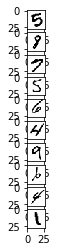

In [6]:
# Randomly choose 10 images from first 1000 images of Train Data.
for index,idx in enumerate(random.sample(range(1000),10)): 
    plt.subplot(10,1,index+1)
    plt.imshow(train_data[idx],cmap="Greys")

In [7]:

# 5 points
# Flatten the train_data and test_data for faster computation.
skl_train_data = np.copy(train_data)
skl_train_labels = np.copy(train_labels)

train_data = train_data.reshape((60000,784))
test_data = test_data.reshape((10000,784))

# If the datatype of the above arrays is int8, convert them to float/int 32/64.
train_data = train_data.astype("float32")
test_data = test_data.astype("float32")

* Find out why we need to convert from int8 to float/int 32/64. [5 pts]

<b>Answer: When data is normalised, it is in the form of decimals (float). Also, cdist converts its inputs to float format. These are the reasons why int8 has to be converted to float.<b>

## 3. KNN Classifier [25 pts]

General Hint: 
* Initially don't try to do any extra optimization: start by just getting the basic kNN algorithm to work.
* Try as simple a version as you can:
   * can you try it for a small set of low-dimensional points?
   * can you try it for a tiny set (e.g. 3 or 4) of MNIST images?

* Once you've got the basics working for a tiny data set, compute the Euclidean Distance more efficiently by using:
$$|| x - y||_2 = x.x^T -2x.y + y.y^T$$

In [8]:
from scipy.spatial.distance import cdist
misinterpreted_results = []
result_index = []
class KNN:
    def __init__(self, k , num_classes=0):
        self.num_classes = num_classes
        self.k = k
        self.parameters = None
    
    def distance_batch(self,data):# M x 784; N x 784
        """
        Find the distance between M instances of data and N instances of training_data.
        data.shape = M,D and training_data.shape= N,D
        The fastest way to find euclidean distance between x and y is described above.
        Observe that x[train] is constant and y [test] is variable.
        """
        training_data = self.parameters[0]
        
        # Normalising the test data by dividing by 255
        #test_data = test_data/255
        
        my_test_data = data/255
        #my_test_lables = data[1]
        
        results_distance = cdist(my_test_data, training_data)
        return results_distance
        
    def train(self, training_data, training_labels):
        """
        Train the classifier using the training data and training labels.
        Hint: Look at Q1 in Review Questions.
        * Store whatever is neccessary in self.parameters.
        * Do whatever pre-computation you think is neccessary to make the distance_batch function run fast.
        """
        # Normalising the the training data by dividing every element by 255
        training_data = training_data/255
        self.parameters = [training_data, training_labels]
        
    def create_empty_dictionary(self, datalen):
        prob=[]
        empty_prob_dict = dict()      
            

        for i in range(datalen):
            empty_prob_dict = dict()
            for j in range(10):
                empty_prob_dict.update({j:0})
            prob.append(empty_prob_dict)

        return prob
    
    def predict(self, data):
        """
        Make use of the trained parameters to predict the class.
        Return the most probable class.
        Make use of the predict_proba function.
        Hint: np.argmax will be useful.
        """
        #results = np.arange(10)
        probs = self.predict_proba(data)
        predictions = probs.argmax(axis=1)
        return predictions
    
    def predict_proba(self,data):
        """
        For each data point, predict the assigned class probabilities.
        For faster sorting, use np.argpartition.
        """
        probabilities = self.create_empty_dictionary(len(data))
        distance_matrix = self.distance_batch(data)
        nearest_neighbor_indices = np.argpartition(distance_matrix, self.k, axis=1)[:,:self.k]
        results=self.parameters[1][nearest_neighbor_indices]
        for i in range(len(data)):
            unique_elements_in_one, occurences = np.unique(results[i], return_counts=True)
            element_probability = occurences/results[i].size
            each_data_prob = dict(zip(unique_elements_in_one, element_probability))
            for each_key in each_data_prob.keys():
                #print(i)
                probabilities[i][each_key]=each_data_prob[each_key]
        results = np.array([list(i.values()) for i in probabilities])
        return results
    
    def accuracy(self, data, labels):
        """
        Returns the accuracy as a percentage computed over the data.
        Already completed for you!
        """
        num_correct = 0
        num_seen = 0
        pred_labels = np.array(self.predict(data))
        i = 0
        for pred,actual in zip(pred_labels,labels):
            if(pred != actual):
                result = {actual:pred}
                result_index.append(i)
                misinterpreted_results.append(result)
            i+=1
        return (pred_labels==labels).sum()/len(data)


In [9]:
custom_knn = KNN(k=5,num_classes=10)
custom_knn.train(train_data,train_labels)

sklearn_knn = KNC(5,algorithm="brute")
sklearn_knn.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Let's instatiate our KNN and the KNN provided by SkLearn. 

First, we will check the accuracy <u>on first 100</u> examples of test dataset.

In [10]:
t=time.clock()
print("Custom KNN Accuracy:\t",custom_knn.accuracy(test_data[:100],test_labels[:100]))
#print("Custom KNN Accuracy:\t",custom_knn.accuracy(test_data,test_labels[0]))
print("Time taken:\t\t",time.clock()-t,"\n")

t=time.clock()
print("SkLearn KNN Accuracy:\t",(sklearn_knn.predict(test_data[:100])==test_labels[:100]).sum()/100)
print("Time taken:\t\t",time.clock()-t)

Custom KNN Accuracy:	 0.99
Time taken:		 3.647943999999999 

SkLearn KNN Accuracy:	 0.99
Time taken:		 0.5138989999999986


To check correctness, we will sample 200 examples from the test dataset and compare the predict_proba methods.

In [11]:
indices = random.sample(range(len(test_data)),200)
selected_data = test_data[indices]
selected_labels = test_labels[indices]
print((custom_knn.predict_proba(selected_data)==sklearn_knn.predict_proba(selected_data)).all())

True


After you have completed all the methods, the output of the above cell should be <code>True</code>.

## 4. Cross-validation to choose <code>k</code>

Use SkLearn to perform <b>10-fold cross-validation</b> across different values of k [1,5,10,15,20]. Use accuracy as the metric.
    - Plot the graph of test accuracy (along with standard-deviation) for each value of k.
    - What is the ideal value of k according to your experiments?
    - How did you decide?

Tips:
* Use the KNN classifier provided SkLearn for the experiments. 
* Refer to <a href="https://scikit-learn.org/stable/modules/cross_validation.html">this</a> page for info on using cross-validation in sklearn.
* Refer to <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html">this</a> page for details on plotting graphs with error-bars.

In [12]:
# Worth 10 points
from sklearn.model_selection import cross_val_score
def kNN_CrossVal(data,labels,ks=[1,5,10,15,20]):
    """
    Write code to generate graph of test-accuracy along with standard deviation
    as a function of the ks.
    """
    mean_values = []
    deviations = []
    
    for k_value in ks:
        skl_knn = KNC(k_value, algorithm="brute")
        skl_knn.fit(data,labels)
        #train model with cv of 10
        cv_scores = cross_val_score(skl_knn, data,labels, cv=10)
        mean_values.append(np.mean(cv_scores))
        deviations.append(np.std(cv_scores))
    
    fig = plt.figure(0)
    plt.errorbar(ks, mean_values, yerr=deviations)
    

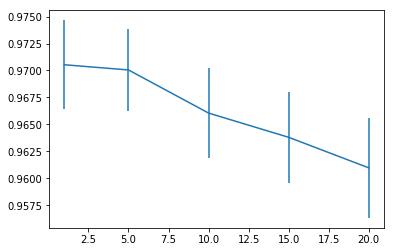

In [13]:
kNN_CrossVal(train_data.reshape((60000,784)), train_labels)

Comment on your observations.

## 5. KNN on a synthetic dataset [5 + 5 + 13]

Complete the following functions which generate synthetic data:
* The function generator_simple generates data of <i>N</i> number_dimensions such that <code>label(X) = 0 if X<sub>0</sub> &le; 0.5 else 1</code>.
* The function generator_complex generates data of <i>N</i> number_dimensions such that <code>label(X) = 0 if X<sub>0</sub> &le; 0.5 XOR X<sub>1</sub> &le; 0.5 else 1</code>.

Note: Each of the dimensions of the data are indepedent and uniformly distributed between 0 and 1.

In [17]:
# Worth 5 points
import random
def generator_simple(number_examples, number_dimensions):
    data = []
    labels = []
    data = np.random.random((number_examples,number_dimensions))
    for i in range(number_examples):
        if(float(data[i][0]) <= 0.5):
            labels.append(0)
        else:
            labels.append(1)   
    return data, labels

In [18]:

random_simple_data = generator_simple(10000, 784)
for i in range(5): # number of examples
    print(str(random_simple_data[0][i]) + " " + str(random_simple_data[1][i]))

[7.36917431e-01 7.94430130e-01 1.89922872e-01 9.65957293e-01
 1.30026107e-01 5.88352450e-01 1.10429400e-01 5.90549284e-01
 2.35213976e-01 1.92684621e-01 2.45804425e-01 4.37587889e-01
 8.79339659e-01 8.10443500e-01 9.74567319e-01 6.15549403e-01
 2.22013357e-02 3.06946558e-01 2.16814388e-02 4.70505088e-01
 4.29601089e-01 3.86185799e-01 5.54551086e-01 5.58698453e-01
 2.80015156e-01 2.06026059e-01 9.40292305e-01 9.91851605e-01
 9.68028415e-01 1.07225261e-01 9.75220005e-01 7.92280850e-01
 4.40429523e-01 8.80365234e-01 9.42464197e-01 6.44475735e-01
 1.57822389e-01 5.91221915e-01 4.59161479e-01 4.91626589e-01
 2.25216423e-01 8.38184362e-01 2.26690156e-01 5.14343484e-04
 2.52508243e-01 1.70648557e-01 5.14758349e-01 2.40169914e-01
 1.45889899e-01 6.99535318e-02 3.82955340e-01 6.26262667e-01
 2.35251513e-01 4.19280865e-03 4.30365783e-01 3.68152996e-01
 1.84141442e-01 3.86415022e-01 3.57891532e-01 4.49604364e-01
 9.00179700e-01 6.35968223e-01 1.10814928e-01 9.15518490e-01
 3.20997149e-01 2.909372

In [19]:
# Worth 5 points
def generator_complex(number_examples,number_dimensions=2):
    data = []
    labels = []
    data = np.random.random((number_examples,number_dimensions))
    for i in range(number_examples):
        if((bool(data[i][0] <= 0.5)) != (bool(data[i][1] > 0.5))):
            labels.append(0)
        else:
            labels.append(1)   
    return data, labels

In [20]:
random_complex_data = generator_complex(5)
for i in range(5):# Number of samples
    print(str(random_complex_data[0][i][0]) + " " + str(random_complex_data[0][i][1]) + " "+ str(random_complex_data[1][i]))

0.28525880038129925 0.7766549363402606 1
0.3751150572033405 0.08893417320757191 0
0.05973035155662876 0.297854122309946 0
0.243727777929023 0.49225835638950044 0
0.0777022221431084 0.6436728148335644 1


Now:
* Perform cross-fold-validation [Use kNN_CrossVal] using 1000 generated data points.
* Vary the number of dimensions and report the results.

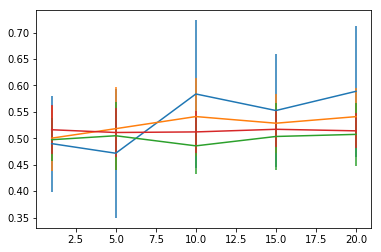

In [22]:
# Code here.
# complex data generation for 100, 392, 784 and 1568 dimensions
random_complex_data = generator_complex(1000, 1568)

#List of dimensions
list_of_dimensions = [100, 392, 784, 1568]
for dim in list_of_dimensions:
    kNN_CrossVal(np.array(random_complex_data[0][:dim]), random_complex_data[1][:dim])

<b>In our tests, we generated different dimensions by halving and doubling 784. What we observed is that, as the number of dimensions decreased, the accuracy of the classifier increased. This can be attested to the fact that as the dimensions increase, the scale of randomly generated data increases too. Also, as the dimensions increase, the available data becomes sparse. This is known as the curse of dimensionality. Hence, the overall accuracy decreases.</b>

How does KNN perform on synthesized datasets of dimensionality of the order of those of MNIST images [784 dimensions]?
* Comment on your observations. [3 pts]
* Why is there a difference in behavior? [10 pts] <br>
[Will be good if you can you graphically compare and contrast. <b>(Possibly hard)</b>]

<b>Answer:</b>


In [23]:
random_complex_data = generator_complex(100, 784)
t=time.clock()
print("Custom KNN Accuracy:\t",custom_knn.accuracy(random_complex_data[0],random_complex_data[1]))
#print("Custom KNN Accuracy:\t",custom_knn.accuracy(test_data,test_labels[0]))
print("Time taken:\t\t",time.clock()-t,"\n")

t=time.clock()
print("SkLearn KNN Accuracy:\t",(sklearn_knn.predict(random_complex_data[0])==random_complex_data[1]).sum()/100)
print("Time taken:\t\t",time.clock()-t)

Custom KNN Accuracy:	 0.54
Time taken:		 3.6007680000000164 

SkLearn KNN Accuracy:	 0.54
Time taken:		 0.8044679999999289


<b> As synthetetic data is passed to the KNN classifier, the accuracy obtained is far lesser as compared to using KNN with the MNIST dataset. The reduction is accuracy can be validated by comparing the accuracy reading for the custom-KNN as well as the KNN provided by scikit learn.
The reason there is a difference in accuracy is because of the randomness of the data being generated (synthetic data). In MNIST, the data represented a specified set of numbers that belonged to one of nine classes (0 to 9). However, there is no such structure in the artificially generated synthetic data. This absence of a given structure/classes attributes to a lower accuracy from the classifier.</b>

## 6. Analyzing performance on MNIST [15 pts]

- Analyze the images which got misclassified by KNN by showing in detail the Nearest Neighbors. Use k=5. <b>[possibly will take effort]</b>
- In order to demonstrate weaknesses, you are welcome to create new examples. [You can use any value of k in this case] 

Predicted value : Actual value - {4: 0}
Index of misinterepreted value: 33
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 0
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 1
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 2
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 3
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 4
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 7
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 8
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 10
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index of misinterepreted value: 12
Mispredicted value: 
Predicted value : Actual value - {0: 1}
Index o

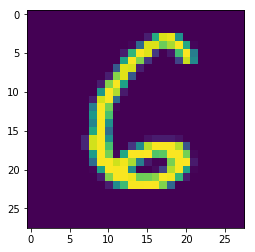

In [24]:
index = 0
for val in misinterpreted_results:
    print("Predicted value : Actual value - " + str(val))
    print("Index of misinterepreted value: " + str(result_index[index]))
    print("Mispredicted value: ")
    plt.imshow(original_test_data[result_index[index]])
    index+=1

<b> The misinterpreted result was classified as 0 as the majority nearest neighbours were 0. Also, the digit looks like an incomplete zero.</b>